In [25]:
import os
import pandas as pd
from classes.section import Section
from classes.station import Station
%matplotlib qt

def get_sta(row):
    return Station(
        chord = row['chord'],
        twist_angle = row['twist_angle'],
        x_offset = row['offset_x'],
        y_offset = row['offset_y'],
        z_offset = row['offset_z'],
        x_multiplier = row['multiplier_x'],
        y_multiplier = row['multiplier_y'],
        z_multiplier = row['multiplier_z'],
        x_mirror = row['mirror_x'],
        y_mirror = row['mirror_y'],
        path = os.path.join(os.getcwd(),'airfoils',f'{row['airfoil']}.txt'),
    )

def get_sec(row):
    return Section(
        station = stations[row.name],
        n_plies = row['n_plies'],
        ply_thickness = row['ply_thickness'],
        overlap_target = row['overlap_target'],
        te_thickness = row['te_thickness'],
        bond_thickness = row['bond_thickness'],
        genFig = row['genFig'],
        saveFig = row['saveFig'],
        tolerance = row['tolerance'],
    )

data_sta = pd.read_csv(f'resources\\data.txt')
data_sec = pd.read_csv(f'resources\\data_sec.txt')
data_jig = pd.read_csv(f'resources\\data_jig.txt')

stations = data_sta.apply(get_sta, axis=1).tolist()

data_sec['bond_thickness'] = 0
data_sec['ply_thickness'] = 1
data_sec['overlap_target'] = data_sec['overlap_target'] * data_sta['chord']
data_jig['overlap_dist'] = data_jig['overlap_dist'] * data_sta['chord']

sections = data_sec.apply(get_sec,axis=1).tolist()

- Completed in 0.389s.

- Completed in 0.379s.

- Completed in 0.776s.

- Completed in 0.377s.

- Completed in 0.396s.

- Completed in 0.389s.

- Completed in 0.419s.

- Completed in 0.827s.

- Completed in 0.368s.

- Completed in 0.407s.

- Completed in 0.404s.



In [2]:
sections[2].info()

Station instance name: skin_1500
Parameters: ['n_plies', 'ply_thickness', 'overlap_target', 'te_thickness', 'bond_thickness', 'saveFig', 'base_airfoil', 'z', 'twist_angle', 'isCircle', 'colours']
Guides: ['chord', 'overlap_offset', 'overlap_start', 'TE']
Indexes: ['ply_cut_bot', 'ply_cut_top', 'LE', 'olp_sta', 'top_sta', 'te_bot', 'idx_te_top']
t-parameters: ['bot_ref', 'bot_splines', 'bot_plies', 'top_ref', 'top_splines', 'top_plies']
CubicSplines: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Points: ['bot_1', 'top_1']
Figures: ['section', 'bottom', 'bottom_trim', 'top', 'top_trim']


In [30]:
sections[-1].figs['bottom_trim'].show()

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10,6))

for i in range(1,9):
    for j in [1,0]:
        t = sections[-1].t['bot_plies'][i][i-j]
        x_curve = sections[-1].splines[i-j]['x'](t)
        y_curve = sections[-1].splines[i-j]['y'](t)

        ax.plot(x_curve, y_curve, label = f'Curve {i}', linewidth = 0.9, color = f'C{i-1}')

ax.axis('equal')

(np.float64(-295.88695065809543),
 np.float64(493.62596382000373),
 np.float64(-84.7449771858021),
 np.float64(47.05337843961406))

In [4]:
for x in range(len(sections)):
    if data_jig['bond_thickness'][x] != 0:
        sections[x].jiggle(overlap_dist = data_jig['overlap_dist'][x], bond_thickness = 3)

for x in range(len(sections)):
    if data_jig['bond_thickness'][x] != 0:
        sections[x].teSpar(te_distance=220, thickness=1, flange_distance=50, n_tePlies=2)

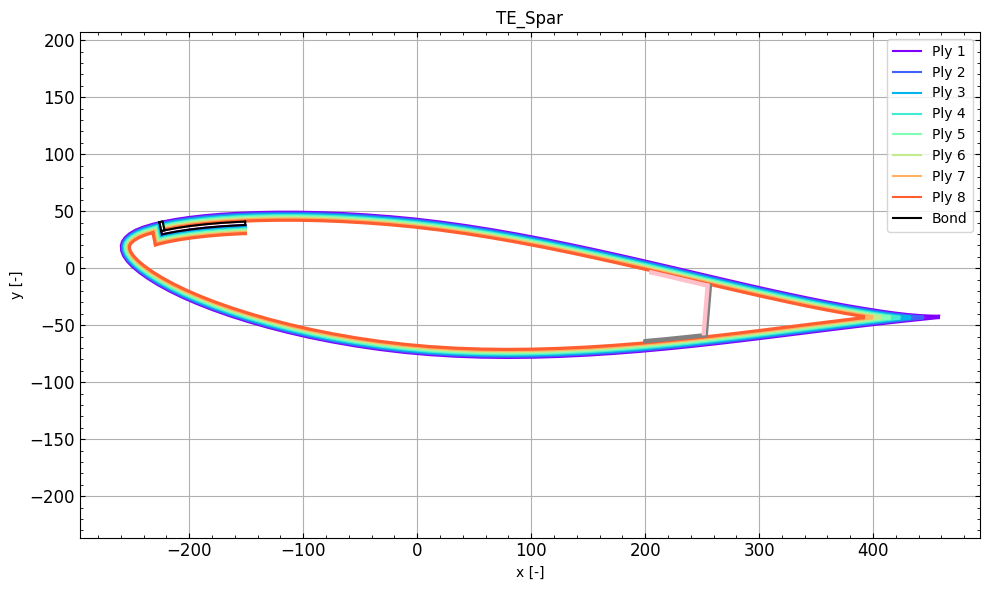

In [5]:
sections[-1].figs['TE_spar']

In [13]:
print(sections[-1].points['bond'][1].keys())
# print(sections[-1].points['bond'][1]['x'])
print(sections[-1].parameters['n_plies'])

dict_keys(['x', 'y'])
8


In [15]:
# Bond

z_all = data_sta['offset_z'].tolist()

for sta in range(len(z_all)):
    
    if not sections[sta].parameters['isCircle']:
    
        for spline in [0,1]:
            x = sections[sta].points['bond'][0][spline]['x']
            y = sections[sta].points['bond'][0][spline]['y']
            z = [z_all[sta]] * len(x)

            df = pd.DataFrame({'x':x,'y':y,'z':z})

            df.to_csv(
                f'tests\\blade_04\\bond\\spl\\bond_{z_all[sta]}_{spline}.txt', 
                index = False, 
                header = False,
            )

        x = sections[sta].points['bond'][1]['x']
        y = sections[sta].points['bond'][1]['y']
        z = [z_all[sta]] * len(x)

        df = pd.DataFrame({'x':x,'y':y,'z':z})

        df.to_csv(
            f'tests\\blade_04\\bond\\ver\\bond_{z_all[sta]}.txt', 
            index = False, 
            header = False,
        )

In [31]:
# Skin

z_all = data_sta['offset_z'].tolist()

for side in ['top','bot']:
    for i in range(len(z_all)):
        for ply in range(1,sections[-1].parameters['n_plies']+1):
            for spline in [0,1]:
                x = sections[i].points[f'{side}_1'][ply][spline]['x']
                y = sections[i].points[f'{side}_1'][ply][spline]['y']
                z = [z_all[i]] * len(x)

                df = pd.DataFrame({'x':x,'y':y,'z':z})

                df.to_csv(
                    f'tests\\blade_05\\skin\\{side}_{z_all[i]}_{ply}_{spline}.txt', 
                    index = False, 
                    header = False,
                )

In [16]:
sections[0].info()

Station instance name: skin_1200
Parameters: ['n_plies', 'ply_thickness', 'overlap_target', 'te_thickness', 'bond_thickness', 'saveFig', 'base_airfoil', 'z', 'twist_angle', 'isCircle', 'colours']
Guides: ['chord', 'TE']
Indexes: ['ply_cut_bot', 'ply_cut_top', 'LE', 'olp_sta', 'top_sta', 'te_bot', 'idx_te_top']
t-parameters: ['bot_ref', 'bot_splines', 'bot_plies', 'top_ref', 'top_splines', 'top_plies']
CubicSplines: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Points: ['bot_1', 'top_1']
Figures: ['section', 'bottom', 'bottom_trim', 'top', 'top_trim']


In [18]:
# Jiggle and Overlap

z_all = data_sta['offset_z'].tolist()

for sta in range(len(z_all)):
    
    if not sections[sta].parameters['isCircle']:
    
        for ply in range(1,sections[-1].parameters['n_plies']+1):
            for spline in [0,1]:
                    x = sections[sta].points[f'bot_3'][ply][spline]['x']
                    y = sections[sta].points[f'bot_3'][ply][spline]['y']
                    z = [z_all[sta]] * len(x)

                    df = pd.DataFrame({'x':x,'y':y,'z':z})

                    df.to_csv(
                        f'tests\\blade_04\\overlap\\olp_{z_all[sta]}_{ply}_{spline}.txt', 
                        index = False, 
                        header = False,
                    )
            
            x = sections[sta].points['bot_2'][ply]['x']
            y = sections[sta].points['bot_2'][ply]['y']
            z = [z_all[sta]] * len(x)
            
            df = pd.DataFrame({'x':x,'y':y,'z':z})

            df.to_csv(
                f'tests\\blade_04\\jiggle\\jig_{z_all[sta]}_{ply}.txt', 
                index = False, 
                header = False,
            )
    
# print(sections[-1].points['bot_2'][1]['x'])
# print(sections[-1].points['bot_3'][1].keys())

In [6]:
# Bond

z_all = data_sta['offset_z'].tolist()

for i in range(len(z_all)):
    if i > 1:
        for part in [0]:
            for spline in [0,1]:
                x = sections[i].points['bond'][part][spline]['x']
                y = sections[i].points['bond'][part][spline]['y']
                z = [z_all[i]] * len(x)

                df = pd.DataFrame({'x':x,'y':y,'z':z})

                df.to_csv(
                    f'tests\\blade_03\\solidworks\\bond\\bond_{z_all[i]}_{part}_{spline}.txt', 
                    index = False, 
                    header = False,
                )

In [16]:
print([float(sections[x].points['bond'][1]['x'][1]) for x in range(2,11)])
print([float(sections[x].points['bond'][1]['y'][1]) for x in range(2,11)])

[-429.8184377400592, -521.4934269085492, -554.0839439984585, -551.7204825614059, -432.64476451917017, -336.3487860563006, -273.53552770010697, -231.81694064013337, -223.3035116348716]
[311.5167605121716, 341.9105912606174, 334.77998079495967, 316.452729111048, 186.5250821153388, 113.02971407622712, 75.96067525050042, 46.61902698565706, 41.06254409300425]


In [ ]:
# Rear Spar

z_all = data_sta['offset_z'].tolist()

for i in range(2,len(z_all)):
    for spline in [0,1]:
        x = sections[i].points['te_spar'][1][1][1][spline]['x']
        y = sections[i].points['te_spar'][1][1][1][spline]['y']
        z = [z_all[i]] * len(x)

        df = pd.DataFrame({'x':x,'y':y,'z':z})

        df.to_csv(
            f'tests\\blade_03\\solidworks\\tesp\\tesp_{z_all[i]}_{spline}.txt', 
            index = False, 
            header = False,
        )

Station instance name: skin_1500
Parameters: ['n_plies', 'ply_thickness', 'overlap_target', 'te_thickness', 'bond_thickness', 'saveFig', 'base_airfoil', 'z', 'twist_angle', 'isCircle', 'colours']
Guides: ['chord', 'overlap_offset', 'overlap_start', 'TE', 'overlap_end', 'te_spar', 'te_spar_flange']
Indexes: ['ply_cut_bot', 'ply_cut_top', 'LE', 'olp_sta', 'top_sta', 'te_bot', 'idx_te_top']
t-parameters: ['bot_ref', 'bot_splines', 'bot_plies', 'top_ref', 'top_splines', 'top_plies', 'bot_3', 'bot_1']
CubicSplines: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Points: ['bot_1', 'top_1', 'bot_2', 'bot_3', 'bond', 'te_spar']
Figures: ['section', 'bottom', 'bottom_trim', 'top', 'top_trim', 'jiggle', 'TE_spar']
None


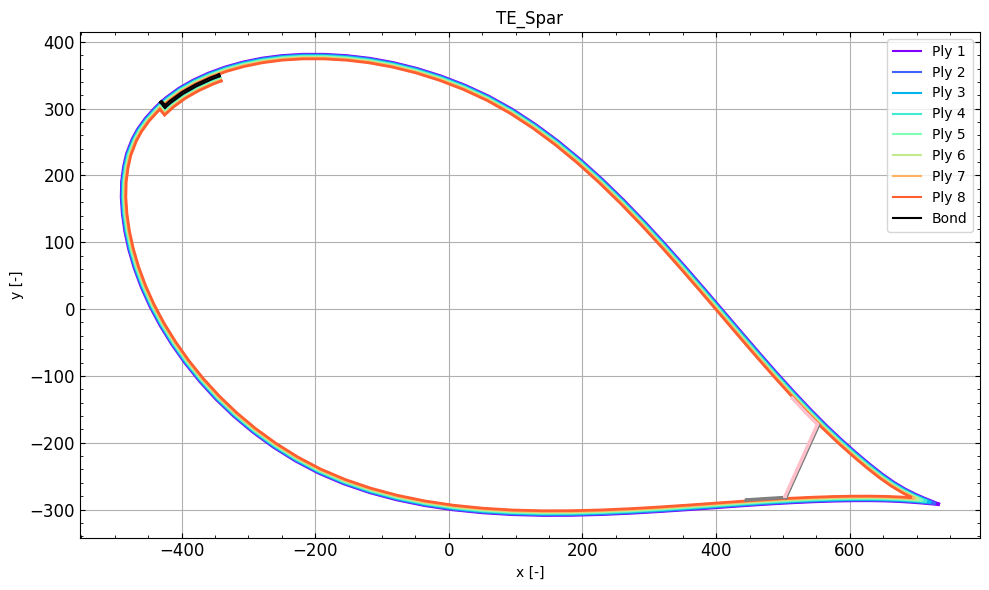

In [ ]:
print(sections[2].info())
sections[2].figs['TE_spar']